In [1]:
# Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mat
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
df = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# Level 0 Analysis:

In [3]:
# Checking for the missing values
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [4]:
# Checking all the columns
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [5]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
# checkng the shape of the dataset
df.shape

(10692, 13)

In [7]:
# Seperating the categorical and continous column
a = df.select_dtypes(exclude = 'object')
b = df.select_dtypes(include = 'object')
alist = list(a.columns)
blist = list(b.columns)
print(tabulate({"Categorical":blist,
                "continuous": alist}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


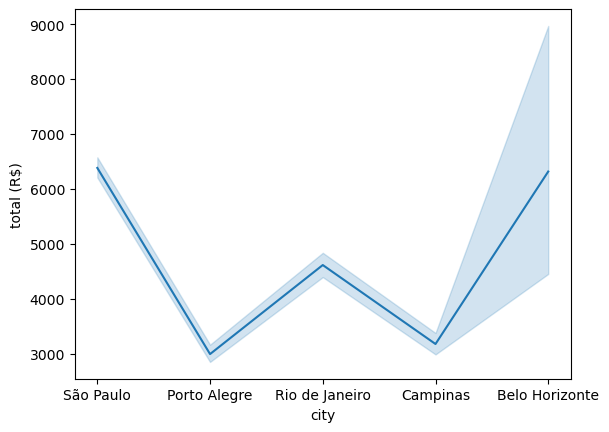

In [8]:
#  Trends in the total cost across diffrent citiees in the Brazil
sns.lineplot(x=df['city'], y = df['total (R$)'])
plt.show()

# Interpretation : Based on the line plot, it appears that the  Sao Paulo and Rio de janerioe are very expensive cities , hence they both are removed and carried out the further analysis.

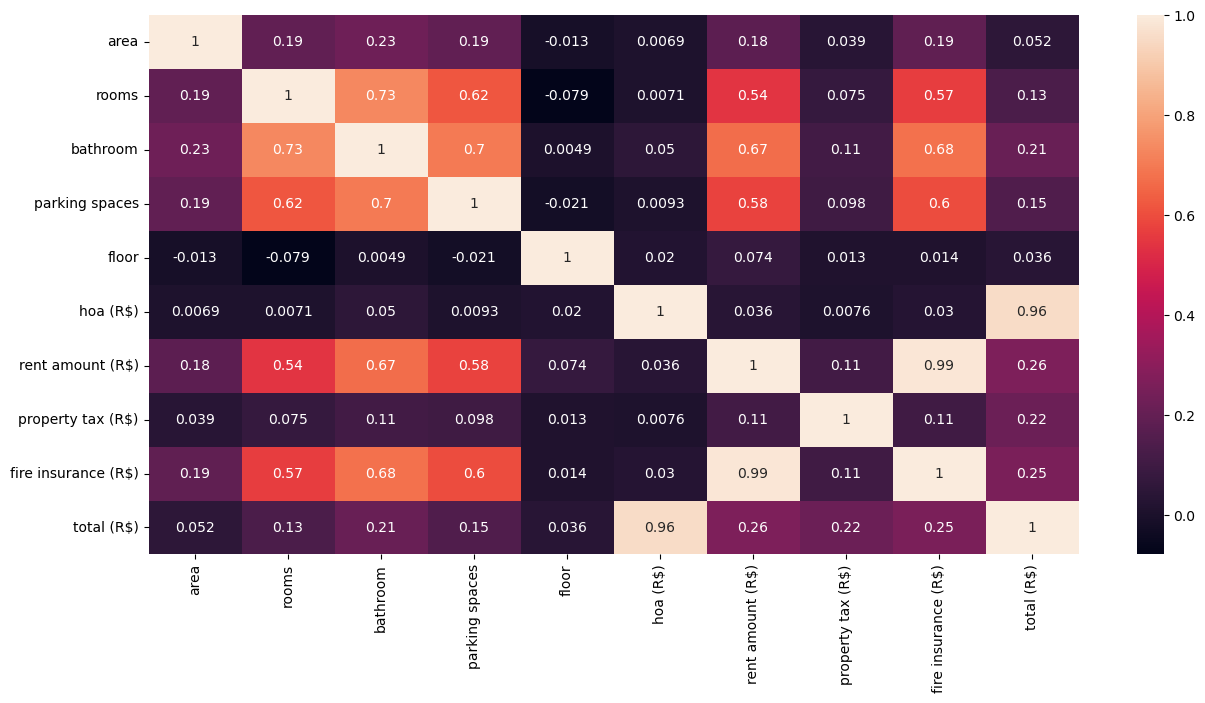

In [9]:
# Finding correlation across all the columns in the dataset
plt.figure(figsize=(15,7))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

# Interpretation : Based on the line plot, it appears that the rental rates in Porto Alegre and Campinas cities are relatively lower compared to other cities. The plot clearly illustrates that these two cities have the lowest rental rates among the data set.

# For Bachelors :

In [10]:
# Renaming the column
df.rename(columns = {'parking spaces' : 'parking_spaces'}, inplace = True)

In [11]:
# Filtering the dataset based on the above condiition mentioned.
dfb = df[((df.rooms == 1)|(df.rooms == 2)) & (df.parking_spaces == 0) & (df.furniture == 'not furnished') & ((df.city != 'São Paulo') & (df.city != 'Rio de Janeiro'))]
dfb

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
96,Campinas,44,1,1,0,7,acept,not furnished,350,550,12,7,919
198,Belo Horizonte,50,2,1,0,5,acept,not furnished,0,900,100,12,1012
201,Porto Alegre,39,1,1,0,7,acept,not furnished,350,850,27,13,1240
203,Porto Alegre,60,2,1,0,1,acept,not furnished,222,1100,46,17,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,Campinas,55,1,1,0,1,acept,not furnished,260,716,12,10,998
10572,Campinas,85,2,1,0,0,acept,not furnished,590,680,0,9,1279
10627,Belo Horizonte,22,1,1,0,0,acept,not furnished,30,450,13,6,499
10642,Porto Alegre,40,1,1,0,2,acept,not furnished,230,700,9,11,950


In [12]:
# Defining the function to  get information about continous dataset
def info_of_cat(col):
    print(f" mode of  {col} is :{dfb[col].mode()[0]}")
    print(f"mean of {col} is : {dfb[col].mean()}")
    print(f"median of {col} is : {dfb[col].median()}")
    print(f"skewness of {col} is : {dfb[col].kurtosis()}")
    print(f"total count of missing values in {col} is : {dfb[col].isnull().sum()}")

Porto Alegre      294
Campinas          110
Belo Horizonte    101
Name: city, dtype: int64


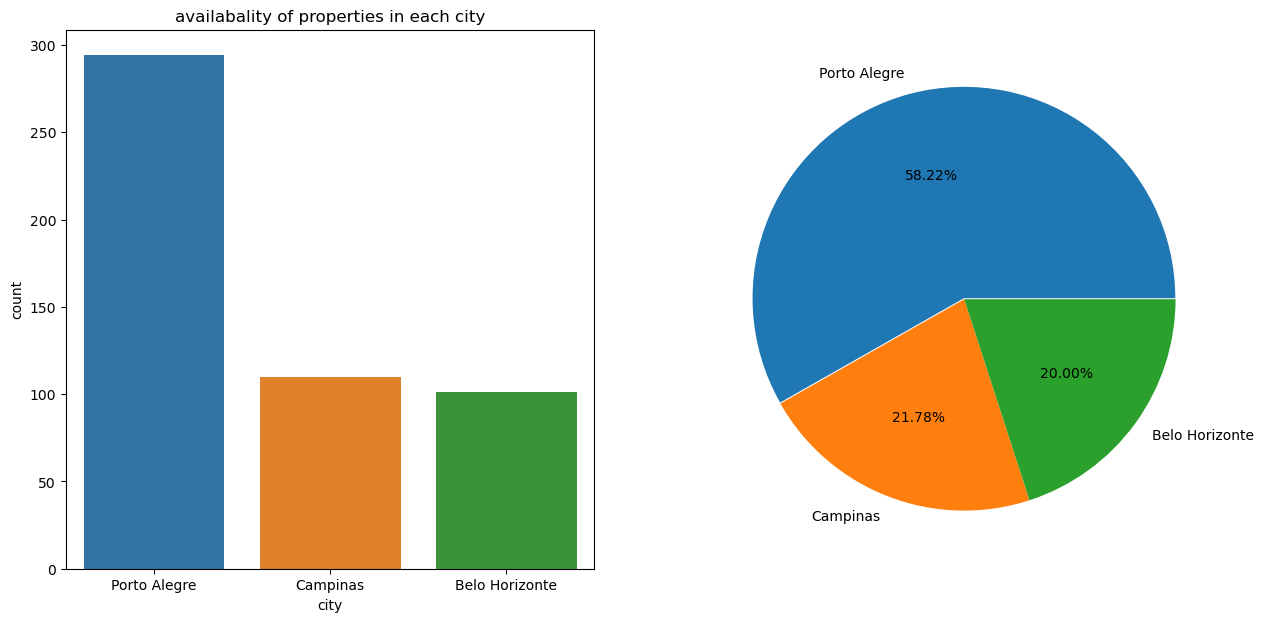

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("availabality of properties in each city")
percentage = dfb["city"].value_counts()
print(percentage)
labels = list(dfb["city"].value_counts().index)

sns.countplot(x=dfb["city"],ax=ax[0])
plt.pie(percentage,labels=labels,explode = [0.005,0.0,0.0], autopct="%0.2f%%")
plt.show()

# Interpretation : The  number properties is more at Porto alegra.

In [14]:
info_of_cat("rent amount (R$)")

 mode of  rent amount (R$) is :1100
mean of rent amount (R$) is : 1078.6871287128713
median of rent amount (R$) is : 980.0
skewness of rent amount (R$) is : 119.24954669736431
total count of missing values in rent amount (R$) is : 0


# the skewness of 84.78 suggests that the distribution of rent amounts is heavily skewed towards the right,This means that there may be a few extremely high rent amounts that are driving the average rent amount to be higher than the median (middle value of the distribution).

In [15]:
mean = df['rent amount (R$)'].mean()
mean
x = df[(df['rent amount (R$)'] > 2000)].index
x

Int64Index([    0,     1,     2,     5,     7,     8,     9,    10,    12,
               13,
            ...
            10680, 10681, 10682, 10683, 10684, 10685, 10686, 10688, 10689,
            10690],
           dtype='int64', length=6613)

In [16]:
for index in x:
    dfb.loc[index, "rent amount (R$)"] = mean

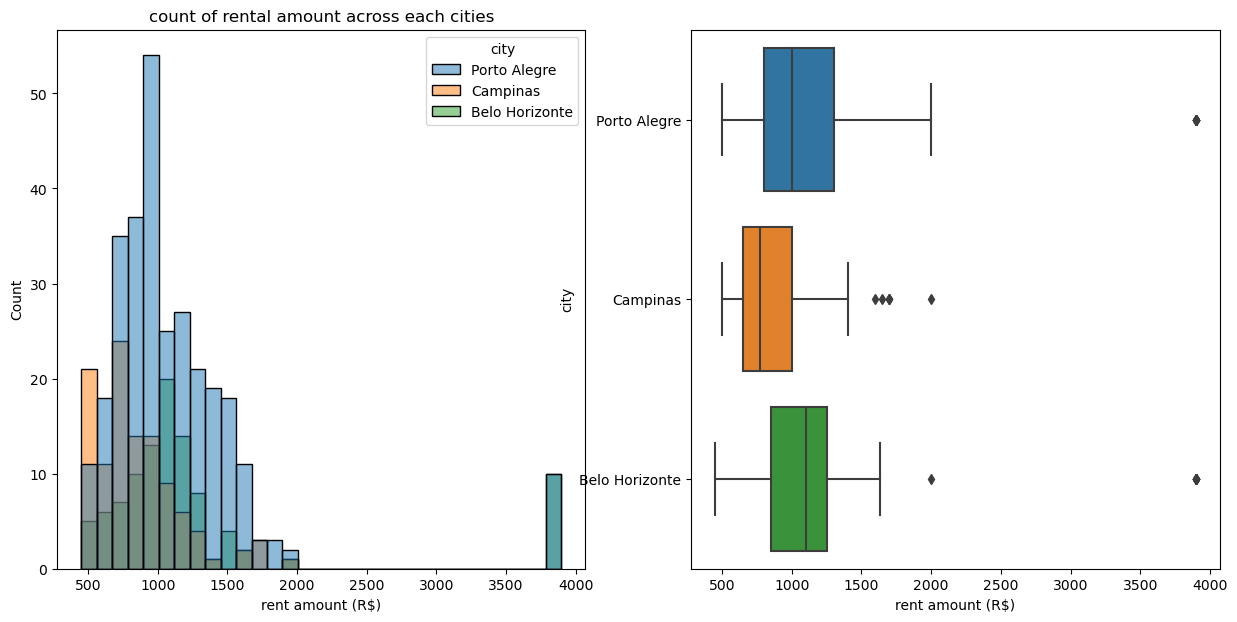

In [17]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.histplot(hue = "city", x = 'rent amount (R$)', data = dfb, ax = ax[0])
sns.boxplot(y= "city", x = 'rent amount (R$)', data = dfb, ax= ax[1])
ax[0].set_title("count of rental amount across each cities")
plt.show()

# Interpretation : Nearly 70% of the houses at Porto alegra having rental rate around 1000 R$ which is cheaper compare to other cities

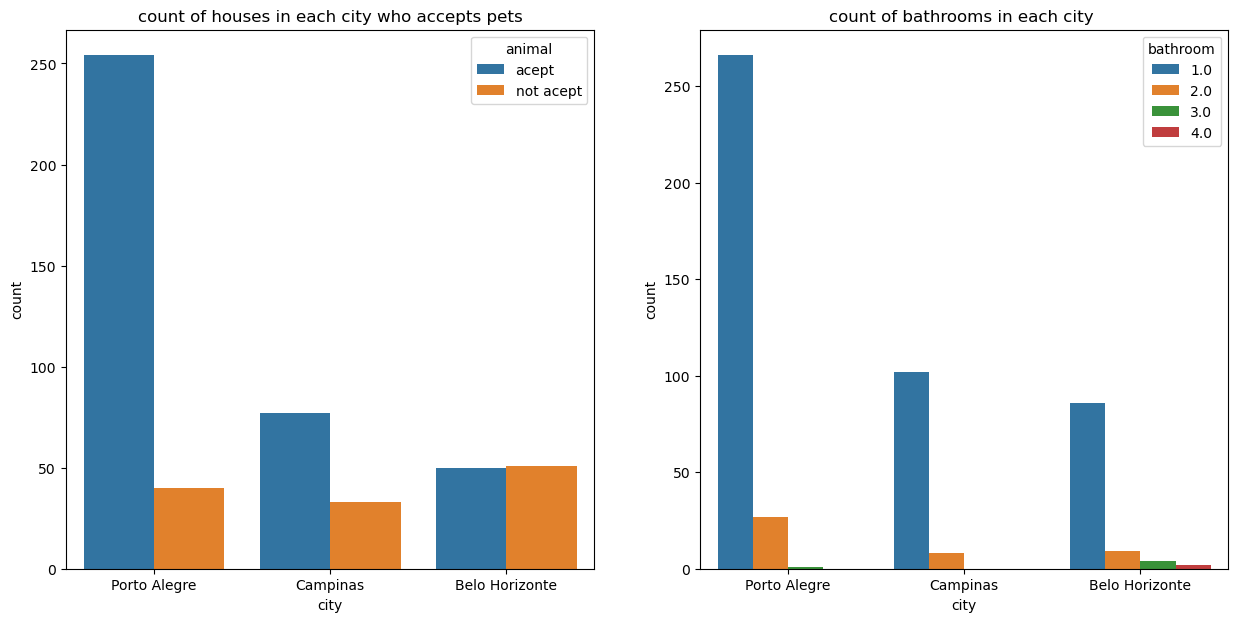

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.countplot(hue = dfb['animal'], x = dfb['city'], ax = ax[0])
sns.countplot(hue = dfb['bathroom'],x = dfb['city'], ax=ax[1])
ax[0].set_title("count of houses in each city who accepts pets")
ax[1].set_title("count of bathrooms in each city ")
plt.show()

# Interpretation : more than 85% of the houses at Porto Alegre has accept the pets  as well as they have single bathroom which is best suit for Bachelors.

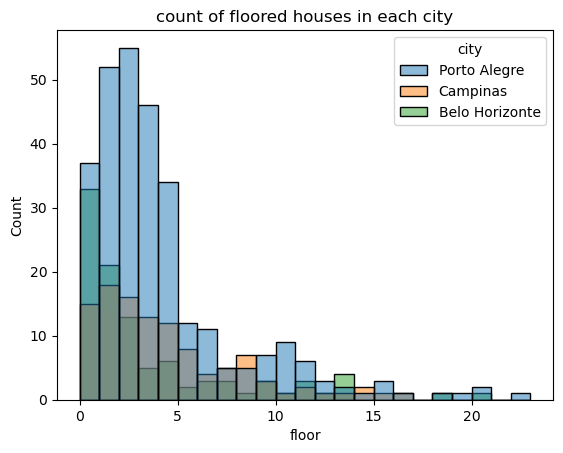

In [19]:
sns.histplot(x = dfb['floor'], hue = dfb['city'])
plt.title("count of floored houses in each city")
plt.show()

# Interpretation : alomost all the houses at Porto Alegra has floors in it .Usually families don't prefer this floors house hence it is best bachelors.

In [20]:
# d1 = pd.pivot_table(dfb, index = 'city', values = 'total (R$)', aggfunc ['mean', 'median','std',(lambda x : x.max() - x.min())])
# d1.rename(columns = {"<lambda>" : "Range"})
# d1
d1 = pd.pivot_table(dfb, index='city', values='total (R$)', aggfunc=['mean', 'median', 'std', (lambda x: x.max() - x.min())])
d1.rename(columns = {"<lambda>" : "Range"}, inplace = True)
d1

,mean,median,std,Range
,total (R$),total (R$),total (R$),total (R$)
city,,,,
Belo Horizonte,23671.702970,1281.0,156608.280103,1119501.0
Campinas,1240.463636,1161.0,348.207880,1906.0
Porto Alegre,1548.935374,1361.0,1891.823590,32241.0


In [21]:
dfb['rent amount (R$)'] .corr (dfb['area'])

0.5413868062123468

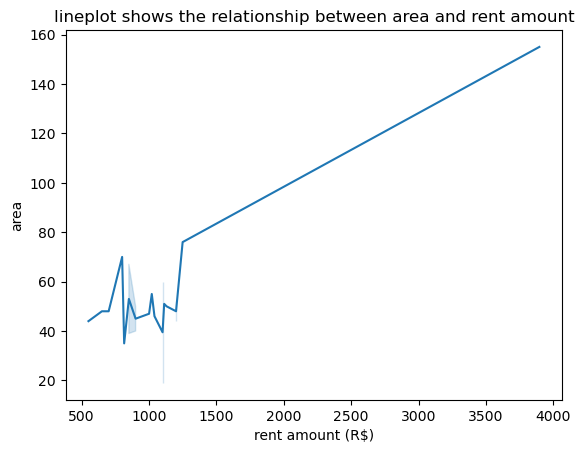

In [22]:
sns.lineplot(x =dfb['rent amount (R$)'].head(20),y = dfb['area'].head(20))
plt.title("lineplot shows the relationship between area and rent amount")
plt.show()

# Interpretation : The as the area increases rent amount also increases gradually.

# Considering the relatively affordable rental rates, pet-friendly and single bathroom homes, availability of properties with floors, 1 or 2 room configurations, potential for lower parking costs, and possibility of unfurnished properties, Porto Alegre may be a suitable location for bachelors. However, it is important to carefully consider individual preferences, requirements before making a final decision on the best location for bachelors.

# Mid sized Family

for Mid sized Family:
1. 3- 4 members
2.2-4 Rooms
3. Parking spaces = 1

In [23]:
dfm = df[((df.rooms == 3)|(df.rooms == 4)) & (df.parking_spaces == 1)  & ((df.city != 'São Paulo') & (df.city != 'Rio de Janeiro'))]
dfm

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
37,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,11000,425,181,11610
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
58,Porto Alegre,75,3,2,1,9,acept,not furnished,340,1800,109,27,2276
82,Porto Alegre,100,4,3,1,8,acept,not furnished,600,2200,159,33,2992
98,Porto Alegre,70,3,2,1,4,acept,not furnished,490,2500,8,37,3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,Porto Alegre,190,4,3,1,0,acept,furnished,0,6450,117,85,6652
10470,Campinas,60,3,1,1,5,not acept,not furnished,600,1800,50,23,2473
10484,Campinas,90,3,1,1,1,acept,not furnished,1000,960,83,13,2056
10487,Porto Alegre,135,4,4,1,6,acept,furnished,1300,3200,300,47,4847


In [24]:
def info_of_cat(col):
    print(f" mode of  {col} is :{dfm[col].mode()[0]}")
    print(f"mean of {col} is : {dfm[col].mean()}")
    print(f"median of {col} is : {dfm[col].median()}")
    print(f"skewness of {col} is : {dfm[col].kurtosis()}")
    print(f"total count of missing values in {col} is : {dfm[col].isnull().sum()}")

In [25]:
info_of_cat("rent amount (R$)")

 mode of  rent amount (R$) is :1100
mean of rent amount (R$) is : 1995.9945945945947
median of rent amount (R$) is : 1607.5
skewness of rent amount (R$) is : 33.57973643189856
total count of missing values in rent amount (R$) is : 0


Belo Horizonte    163
Porto Alegre      116
Campinas           91
Name: city, dtype: int64


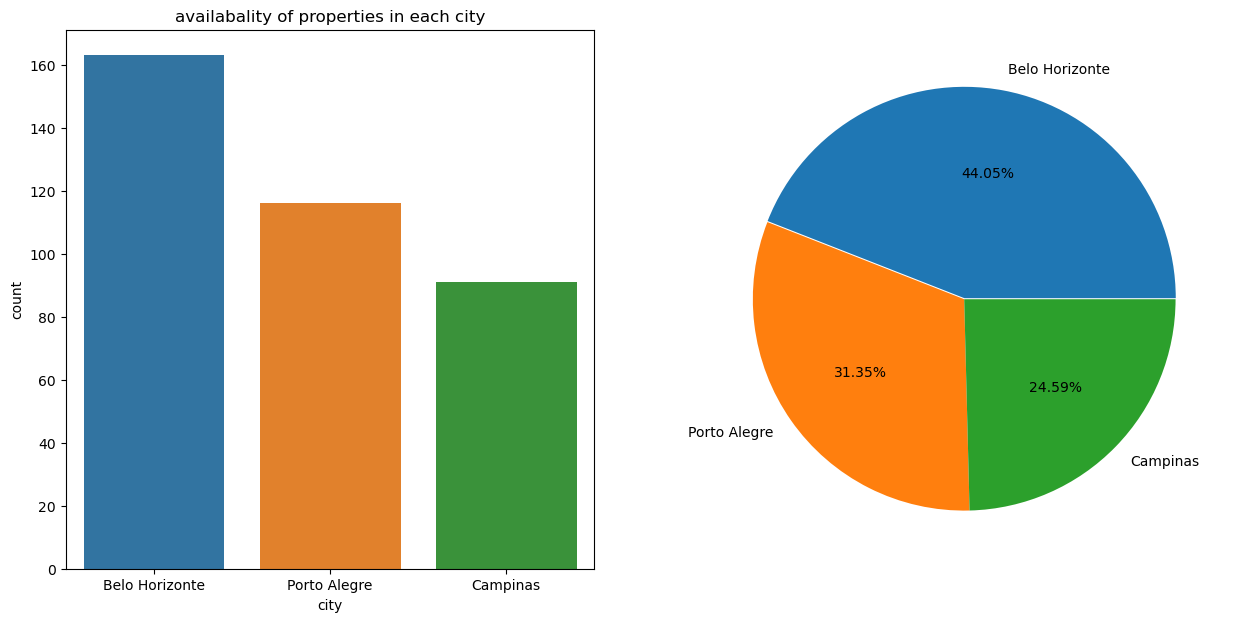

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("availabality of properties in each city")
percentage = dfm["city"].value_counts()
print(percentage)
labels = list(dfm["city"].value_counts().index)

sns.countplot(x=dfm["city"],ax=ax[0])
plt.pie(percentage,labels=labels,explode = [0.005,0.0,0.0], autopct="%0.2f%%")
plt.show()

# Interpretation : The availability of properties having all the mid sized family condition  are more for Belo Horizonte city.

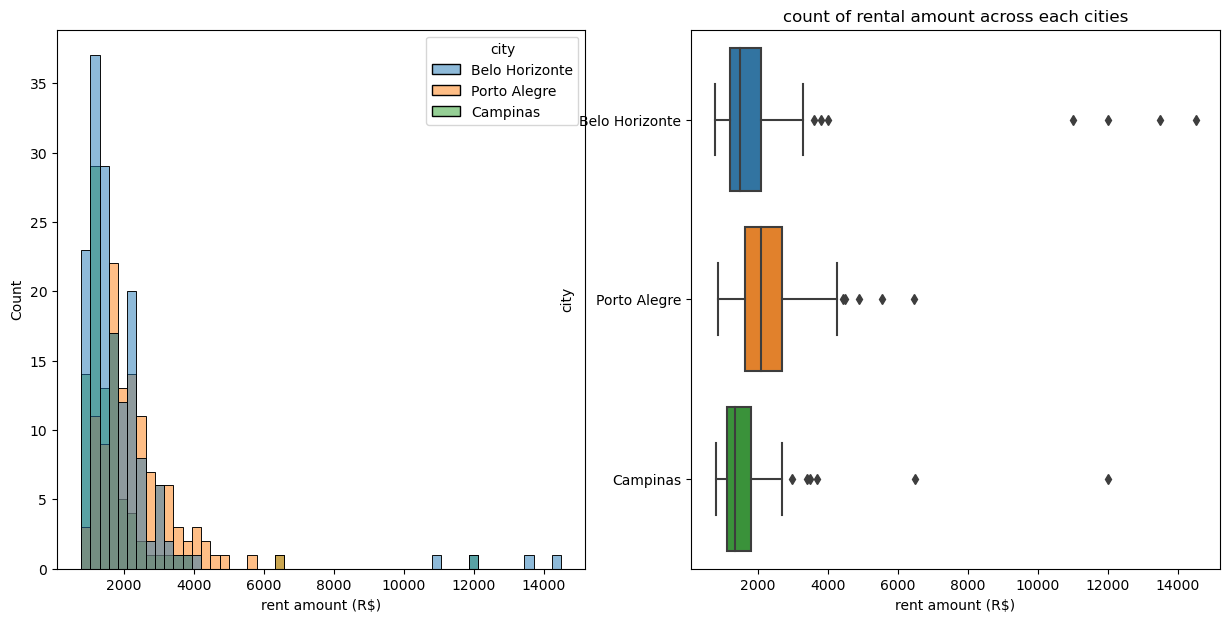

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.title("count of rental amount across each cities")
sns.histplot(hue = "city", x = 'rent amount (R$)', data = dfm, ax = ax[0])
sns.boxplot(y= "city", x = 'rent amount (R$)', data = dfm, ax= ax[1])
plt.show()

# "An impressive 70% of houses in Belo Horizonte offer a budget-friendly rental rate of approximately 1500 R$, making it a more affordable option for mid sized family compared to other cities."


In [28]:
mean = dfm['rent amount (R$)'].mean()
mean
x = dfm[(dfm['rent amount (R$)'] > 4000)].index

In [29]:
for index in x:
    dfm.loc[index,'rent amount (R$)' ] = mean

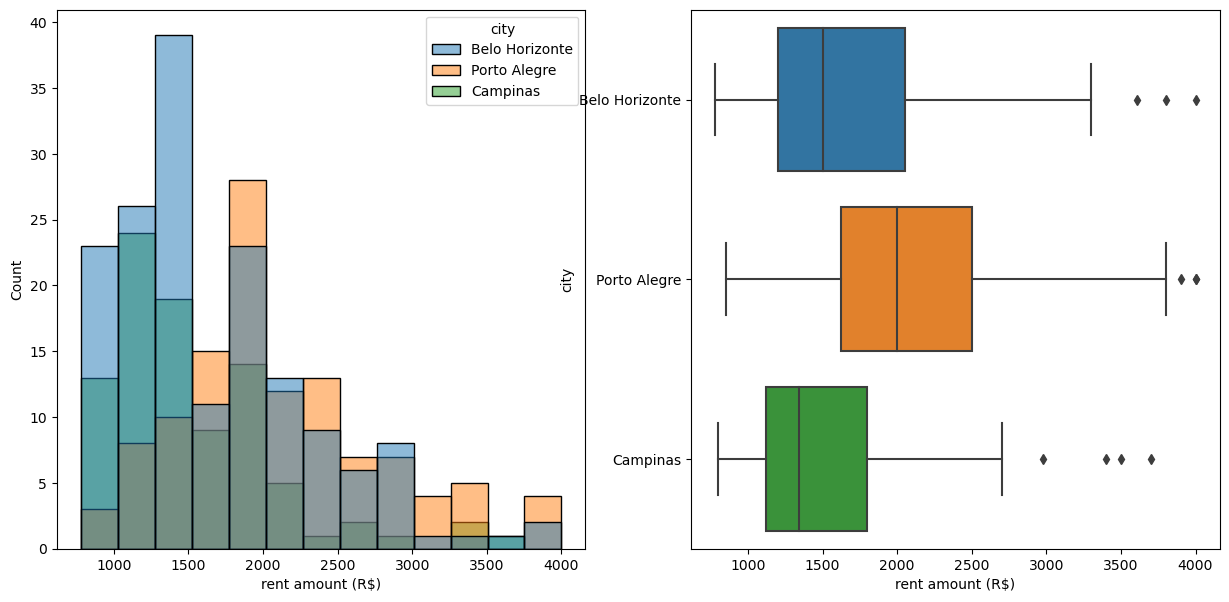

In [30]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.histplot(hue = "city", x = 'rent amount (R$)', data = dfm, ax = ax[0])
sns.boxplot(y= "city", x = 'rent amount (R$)', data = dfm, ax= ax[1])
plt.show()

# Interpretation : Nearly 80% of the houses at Belo Horizon having rental rate less than 2000 R$ which is affordable for mid sized family.

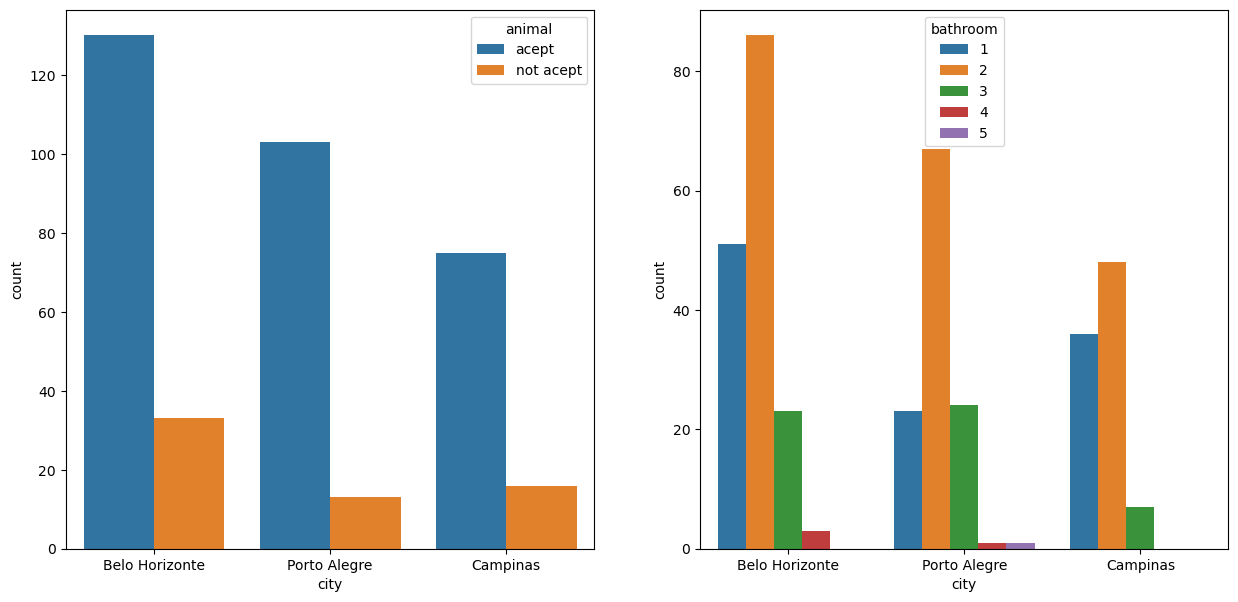

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.countplot(hue = dfm['animal'], x = dfm['city'], ax = ax[0])
sns.countplot(hue = dfm['bathroom'],x = dfm['city'], ax=ax[1])
plt.show()

# Interpretation : more than 80% of houses at Belo Horizonte they accept pets and Having 2 bathrooms which is best for midsized family.

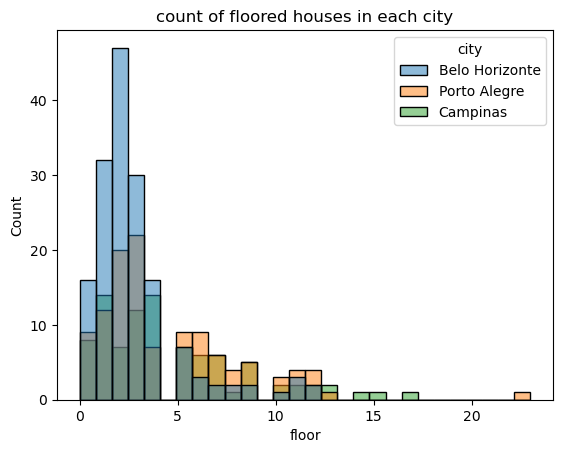

In [32]:
sns.histplot(x = dfm['floor'], hue = dfm['city'])
plt.title("count of floored houses in each city")
plt.show()

# Interpretation: More than 70% of houses at Belo Horizonte has either 0, 1 or 2 floors which better for Mid size family.

In [33]:
d1 = pd.pivot_table(dfm, index='city', values='rent amount (R$)', aggfunc=['mean', 'median', 'std', (lambda x: x.max() - x.min())])
d1.rename(columns = {"<lambda>" : "Range"}, inplace = True)
d1

,mean,median,std,Range
,rent amount (R$),rent amount (R$),rent amount (R$),rent amount (R$)
city,,,,
Belo Horizonte,1682.214591,1500.000000,648.209204,3220.0
Campinas,1527.648233,1341.000000,585.445496,2900.0
Porto Alegre,2134.637605,1995.994595,703.713154,3150.0


In [34]:
dfm['rent amount (R$)'].corr(df['total (R$)'])

0.563467772587315

Room Options: The availability of houses with 2-4 rooms in Belo Horizonte indicates that families can find housing options that offer adequate space for their needs, accommodating the typical requirements of mid-sized families in terms of bedrooms.

Parking Spaces: The inclusion of 1 parking space with the housing options in Belo Horizonte is beneficial for families with vehicles, providing convenience and practicality for mid-sized families who may have one or more cars.

Affordable Rental Rates: With nearly 80% of houses in Belo Horizonte having rental rates less than 2000 R$, it indicates that there are ample options for mid-sized families to find affordable housing in the city.

Pet-Friendly Properties: More than 80% of houses in Belo Horizonte accepting pets suggests that families with pets will have a higher chance of finding suitable housing without facing restrictions on keeping pets, which is beneficial for mid-sized families who may have pets as part of their household.

Multiple Bathrooms: The availability of houses with 2 bathrooms in Belo Horizonte, which is suitable for mid-sized families, indicates that families can find housing options that cater to their needs and preferences in terms of bathroom facilities.

Appropriate Number of Floors: The fact that over 70% of houses in Belo Horizonte have 0, 1, or 2 floors, which is generally considered ideal for mid-sized families, suggests that families can find housing options with the desired number of floors that meet their requirements and preferences.

Overall, considering the availability of affordable rental rates, pet-friendly properties, houses with multiple bathrooms, and appropriate number of floors, Belo Horizonte appears to be a favorable city for mid-sized families to find suitable housing options.

for Large  sized Family:
1. >4 members
2.>4 Rooms
3. Parking spaces >1

In [35]:
dfl = df[(df.rooms > 4) & (df.parking_spaces > 1) & (df.bathroom > 2) &(df.furniture == 'furnished') & ((df.city != 'São Paulo') & (df.city != 'Rio de Janeiro'))]
dfl

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
538,Belo Horizonte,428,5,5,4,0,acept,furnished,0,9600,667,158,10430
726,Belo Horizonte,325,5,4,7,0,acept,furnished,0,8900,417,146,9463
753,Belo Horizonte,600,5,6,8,0,acept,furnished,0,10500,642,173,11320
915,Porto Alegre,600,5,4,5,0,acept,furnished,0,12000,1167,214,13380
1041,Belo Horizonte,800,7,7,4,0,acept,furnished,0,8900,943,146,9989
1255,Porto Alegre,450,5,4,4,0,acept,furnished,0,9000,250,160,9410
1334,Campinas,650,5,4,8,0,acept,furnished,0,8500,442,128,9070
2423,Belo Horizonte,1020,5,4,6,0,acept,furnished,0,6520,654,107,7281
2564,Belo Horizonte,649,5,5,6,0,acept,furnished,0,15000,1065,246,16310


Belo Horizonte    19
Porto Alegre       7
Campinas           2
Name: city, dtype: int64


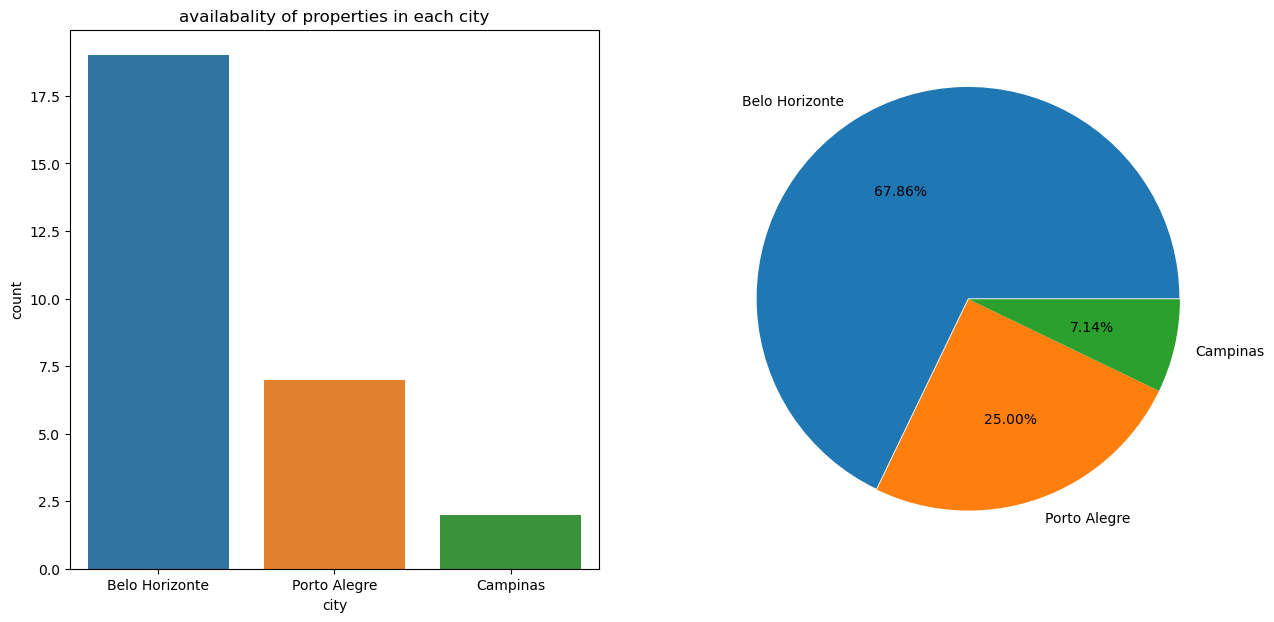

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("availabality of properties in each city")
percentage = dfl["city"].value_counts()
print(percentage)
labels = list(dfl["city"].value_counts().index)

sns.countplot(x=dfl["city"],ax=ax[0])
plt.pie(percentage,labels=labels,explode = [0.005,0.0,0.0], autopct="%0.2f%%")
plt.show()

# Interpretation : There are only few houses available for large sized families availability of properties having all the large sized family conditions are more for Belo Horizonte city.

In [37]:
def info_of_cat(col):
    print(f" mode of  {col} is :{dfl[col].mode()[0]}")
    print(f"mean of {col} is : {dfl[col].mean()}")
    print(f"median of {col} is : {dfl[col].median()}")
    print(f"skewness of {col} is : {dfl[col].kurtosis()}")
    print(f"total count of missing values in {col} is : {dfl[col].isnull().sum()}")

In [38]:
info_of_cat("rent amount (R$)")

 mode of  rent amount (R$) is :12000
mean of rent amount (R$) is : 8998.964285714286
median of rent amount (R$) is : 8700.0
skewness of rent amount (R$) is : -0.7953293525648619
total count of missing values in rent amount (R$) is : 0


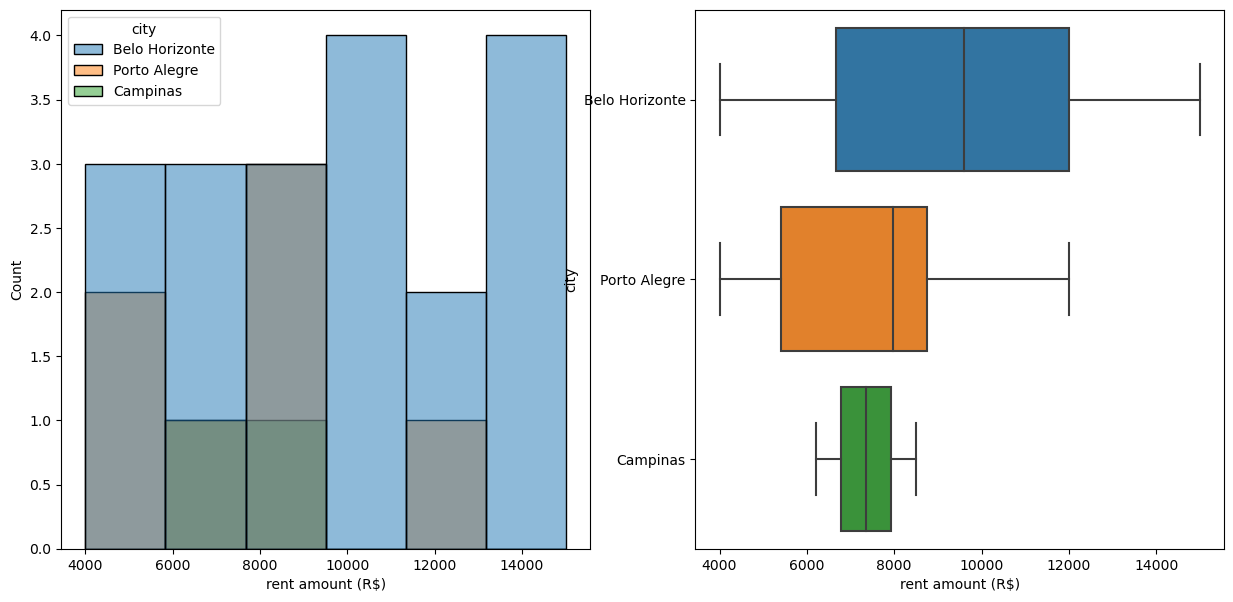

In [39]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.histplot(hue = "city", x = 'rent amount (R$)', data = dfl, ax = ax[0])
sns.boxplot(y= "city", x = 'rent amount (R$)', data = dfl, ax= ax[1])
plt.show()

In [40]:
# outlier treatment

In [41]:
mean = dfl['rent amount (R$)'].mean()
mean
x = dfl[(dfl['rent amount (R$)'] > 8000)].index

In [42]:
for index in x:
    dfl.loc[index,'rent amount (R$)' ] = mean

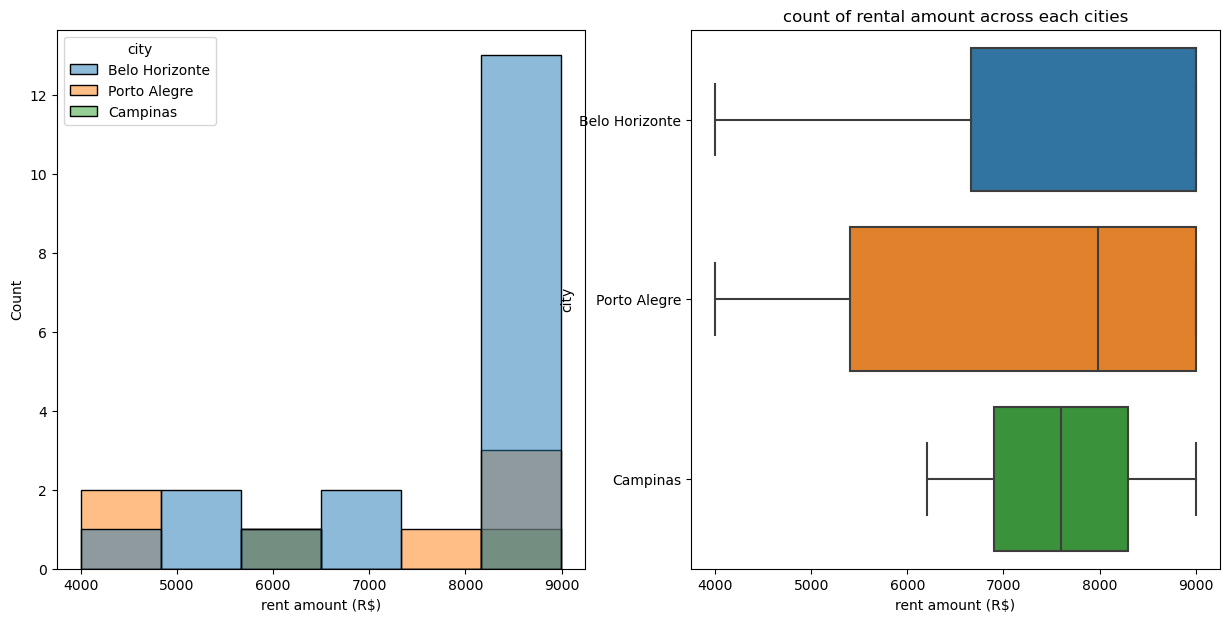

In [43]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.title("count of rental amount across each cities")
sns.histplot(hue = "city", x = 'rent amount (R$)', data = dfl, ax = ax[0])
sns.boxplot(y= "city", x = 'rent amount (R$)', data = dfl, ax= ax[1])
plt.show()

# Interpretation : A significant majority of houses suitable for large families are currently available in Belo Horizonte, accounting for approximately 70% of the total. Moreover, an even higher proportion of these houses, also exceeding 70%, are listed at an affordable monthly rent of 9000, making them an attractive option for families requiring ample space.

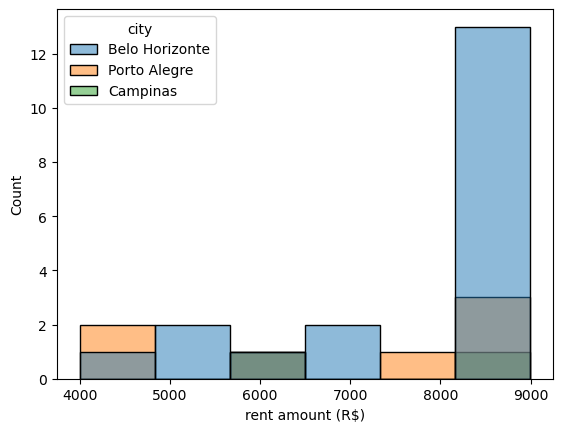

In [44]:
sns.histplot(hue = dfl['city'], x = dfl['rent amount (R$)'] )
plt.show()

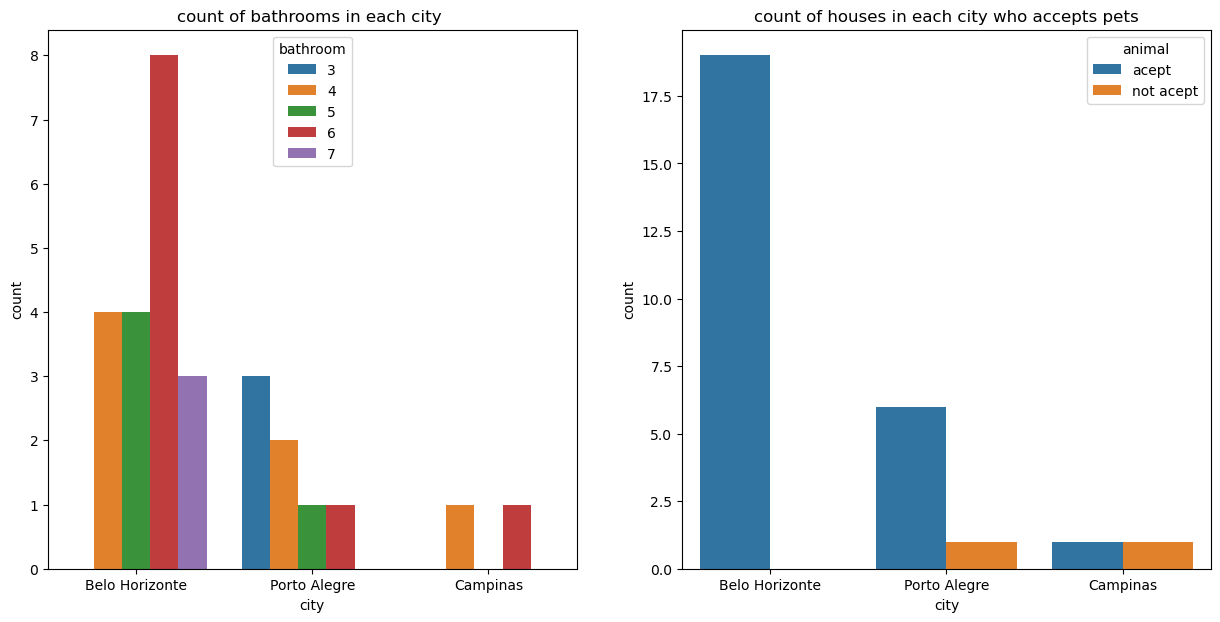

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.countplot(hue = dfl['bathroom'], x = dfl['city'], ax=ax[0])
sns.countplot(hue = dfl['animal'],x = dfl['city'], ax=ax[1])
ax[1].set_title("count of houses in each city who accepts pets")
ax[0].set_title("count of bathrooms in each city ")
plt.show()

# Interpretation : Belo Horizonte offers an abundance of pet-friendly houses that are ideal for large families. Additionally, a majority of these houses boast more than 3 bathrooms, making them well-suited for accommodating the needs of a sizable family.

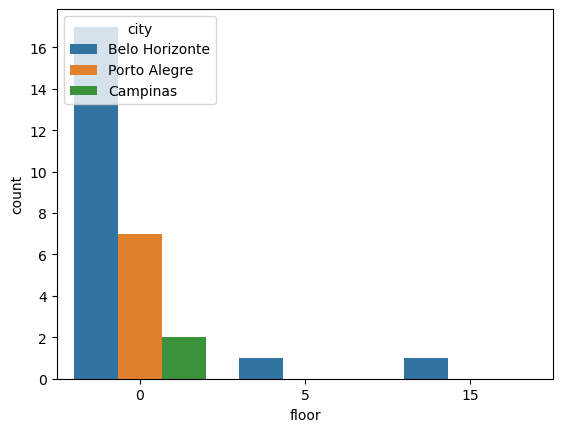

In [46]:
sns.countplot(x = dfl['floor'], hue = dfl['city'])
plt.show()

# Interpretation: A significant majority, exceeding 85%, of the houses available in Belo Horizonte are designed with 0 floors, making them an optimal choice for large families. These single-level houses provide ample space and convenience, catering to the needs of families seeking a comfortable and accessible living environment.

In [47]:
d2 = pd.pivot_table(dfl, index='city', values='total (R$)', aggfunc=['mean', 'median', 'std', (lambda x: x.max() - x.min())])
d2.rename(columns = {"<lambda>" : "Range"}, inplace = True)
d2

,mean,median,std,Range
,total (R$),total (R$),total (R$),total (R$)
city,,,,
Belo Horizonte,10839.315789,10430,3762.394983,11228
Campinas,7849.000000,7849,1726.754760,2442
Porto Alegre,7971.428571,8168,3092.393402,9191


# These statistical measures provide insights into the distribution and variability of monthly rent in these three cities, with Belo Horizonte having the highest mean and range, and Campinas having the lowest standard deviation.

Abundance of houses suitable for large families: Belo Horizonte has a significant majority (approximately 70%) of houses that are suitable for large families, providing ample space for family members.

Affordable rent options: A high proportion (exceeding 70%) of these houses are listed at an affordable monthly rent of 9000, making them an attractive option for families on a budget.

Pet-friendly houses: Belo Horizonte offers a wide selection of pet-friendly houses, which is ideal for families with furry companions.

Multiple bathrooms: A majority of houses in Belo Horizonte boast more than 3 bathrooms, accommodating the needs of a sizable family.

Single-level houses: A significant majority (exceeding 85%) of the houses in Belo Horizonte have 0 floors, providing convenience and accessibility for large families.

Statistical measures: Belo Horizonte has the highest mean and range of monthly rent among the three cities compared, indicating a wider availability of housing options for large families.

Considering all these factors, Belo Horizonte appears to be a favorable choice for large families in terms of available houses, affordability, pet-friendliness, amenities, and statistical measures.

In [48]:
df1 = df[(df.rooms > 4) & (df.parking_spaces > 1) & (df.bathroom > 2) &(df.furniture == 'not furnished') & ((df.city != 'São Paulo') & (df.city != 'Rio de Janeiro'))]
df1

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
143,Campinas,999,5,7,8,0,acept,not furnished,0,14000,667,211,14880
404,Belo Horizonte,168,5,3,2,2,acept,not furnished,1443,2900,408,39,4790
432,Campinas,198,6,3,4,0,acept,not furnished,0,2000,145,31,2176
546,Belo Horizonte,500,7,4,4,0,acept,not furnished,0,5500,167,91,5758
560,Belo Horizonte,260,5,3,3,12,acept,not furnished,2000,4000,487,54,6541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,Belo Horizonte,460,5,8,5,0,not acept,not furnished,0,7320,0,121,7441
10392,Porto Alegre,480,5,4,7,0,acept,not furnished,0,3600,38,64,3702
10476,Porto Alegre,600,5,7,5,0,acept,not furnished,0,7000,834,125,7959
10587,Belo Horizonte,500,8,5,8,0,acept,not furnished,0,5000,150,82,5232


Belo Horizonte    77
Porto Alegre      21
Campinas          13
Name: city, dtype: int64


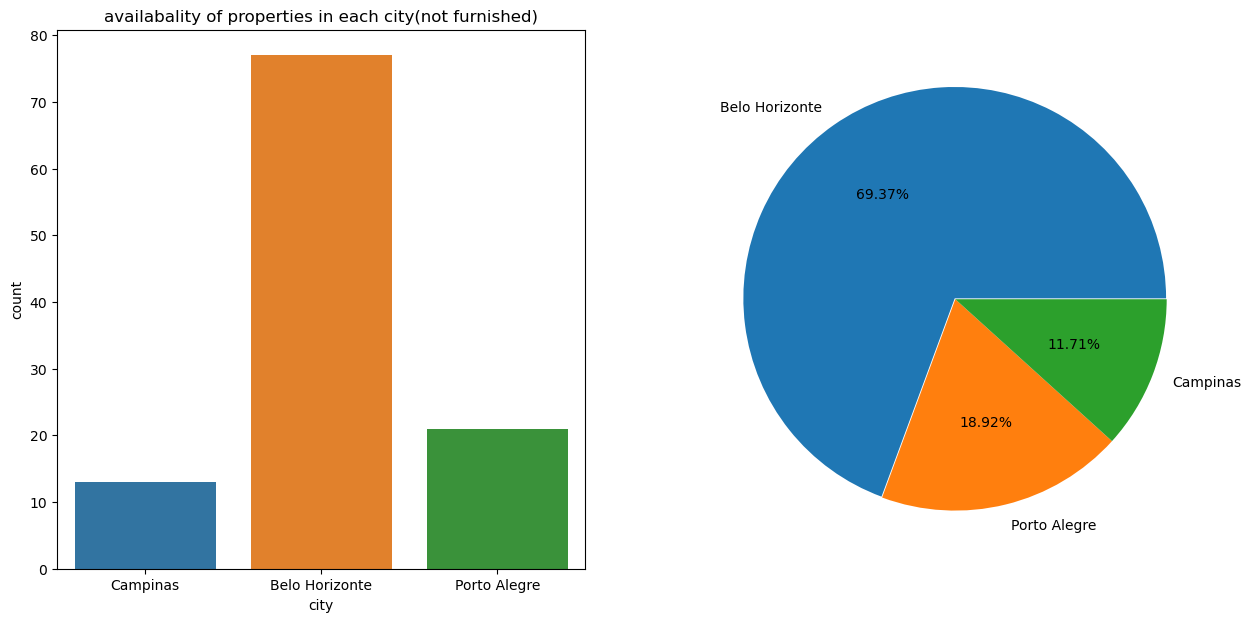

In [49]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("availabality of properties in each city(not furnished)")
percentage = df1["city"].value_counts()
print(percentage)
labels = list(df1["city"].value_counts().index)

sns.countplot(x=df1["city"],ax=ax[0])
plt.pie(percentage,labels=labels,explode = [0.005,0.0,0.0], autopct="%0.2f%%")
plt.show()

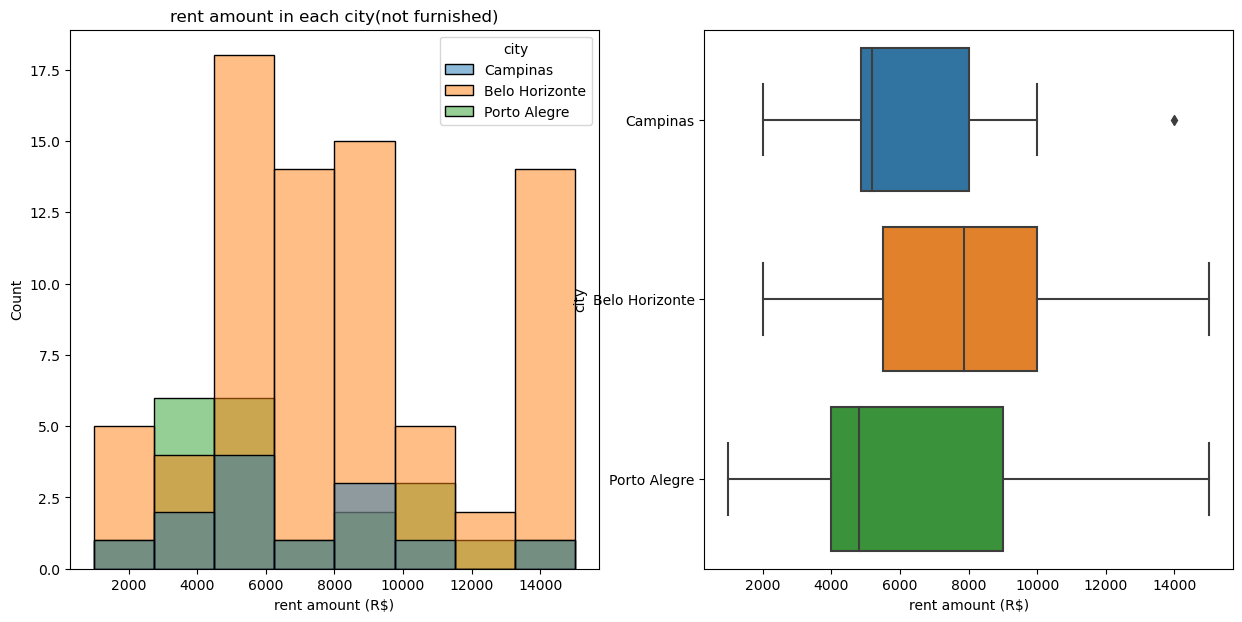

In [50]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].set_title("rent amount in each city(not furnished)")
sns.histplot(hue = "city", x = 'rent amount (R$)', data = df1, ax = ax[0])
sns.boxplot(y= "city", x = 'rent amount (R$)', data = df1, ax= ax[1])
plt.show()

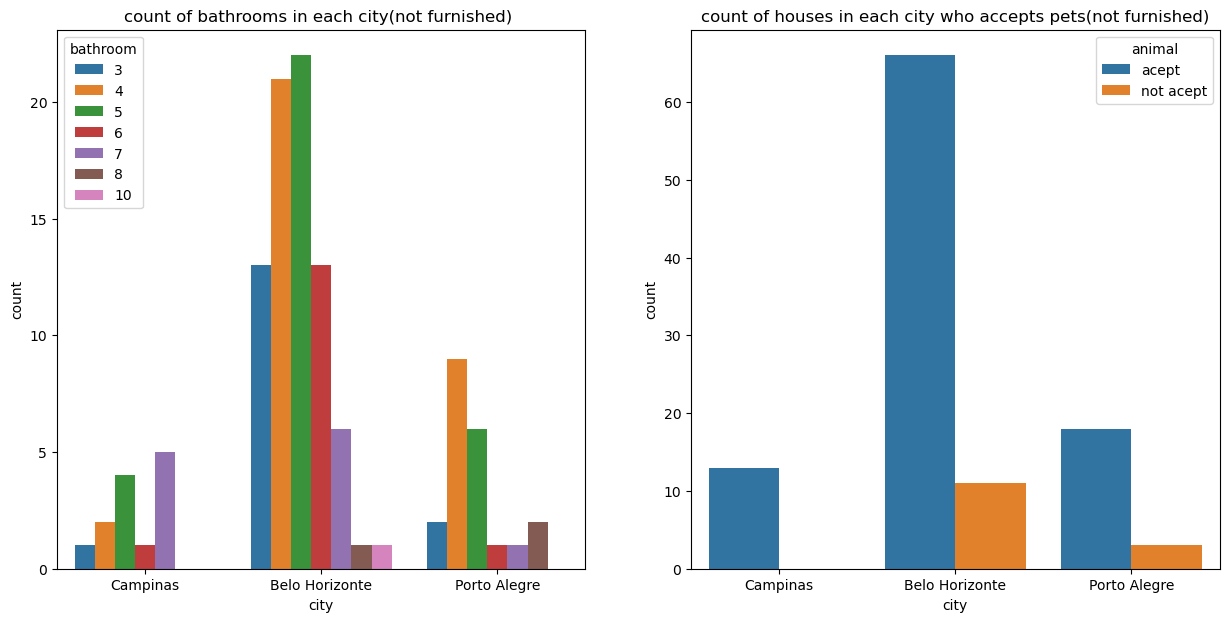

In [51]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
# ax[0].set_title("rent amount in each city(not furnished)")
sns.countplot(hue = df1['bathroom'], x = df1['city'], ax=ax[0])
sns.countplot(hue = df1['animal'],x = df1['city'], ax=ax[1])
ax[1].set_title("count of houses in each city who accepts pets(not furnished)")
ax[0].set_title("count of bathrooms in each city(not furnished) ")
plt.show()

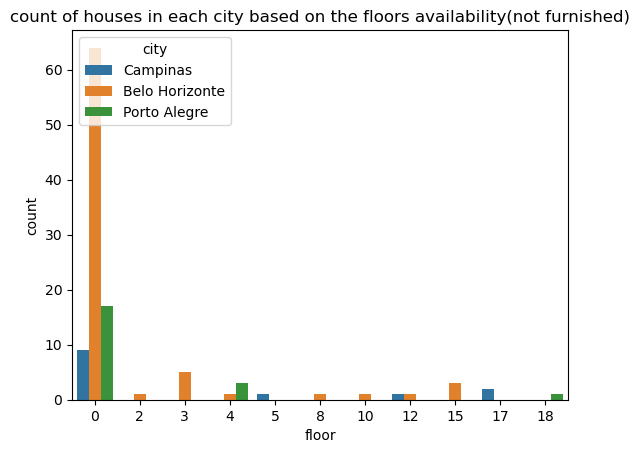

In [52]:
sns.countplot(x = df1['floor'], hue = df1['city'])
plt.title("count of houses in each city based on the floors availability(not furnished)")
plt.show()

Conclusion

Considering the relatively affordable rental rates, 
pet-friendly and single bathroom homes, availability of properties with floors, 1 or 2 room configurations, potential for lower parking costs, and possibility of unfurnished properties, Porto Alegre may be a suitable location for bachelors. However, it is important to carefully consider individual preferences, requirements before making a final decision on the best location for bachelors.

Overall, considering the availability of affordable rental rates, pet-friendly properties, houses with multiple bathrooms, and appropriate number of floors, Belo Horizonte appears to be a favorable city for mid-sized families to find suitable housing options.

Considering all these factors, Belo Horizonte appears to be a favorable choice for large families in terms of available houses, affordability, pet-friendliness, amenities, and statistical measures.